In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import torch

print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device count: {torch.cuda.device_count()}")
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"CUDA device name: {torch.cuda.get_device_name()}")

CUDA available: True
CUDA device count: 1
Current CUDA device: 0
CUDA device name: NVIDIA GeForce RTX 3060 Laptop GPU


In [30]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    os.chdir(project_root)

#### Data loading

In [31]:
import pandas as pd

from paths import DATA_DIR

df = pd.read_csv(DATA_DIR / "customer_support_emails_dataset.csv", index_col=0)

df.head()

,subject,body,department
0,EchoWave One volume issue???,why is the volume so low?? i updated everythin...,Tech Support
1,AuraPods Gen 2 Bluetooth Pairing Issue - Immed...,I purchased the AuraPods Gen 2 (firmware versi...,Tech Support
2,SOUNDBAR FLEX UPDATE BROKE IT - FIX THIS NOW!,YOUR FIRMWARE 4.5.1 UPDATE COMPLETELY BROKE MY...,Tech Support
3,PulseDock (Firmware 3.4.2) won't connect despi...,"Hello,\n\nI'm having trouble getting my PulseD...",Tech Support
4,EchoWave Mini keeps cutting out,"Hi, my EchoWave Mini keeps cutting out randoml...",Tech Support


#### Department distribution

<Axes: xlabel='department'>

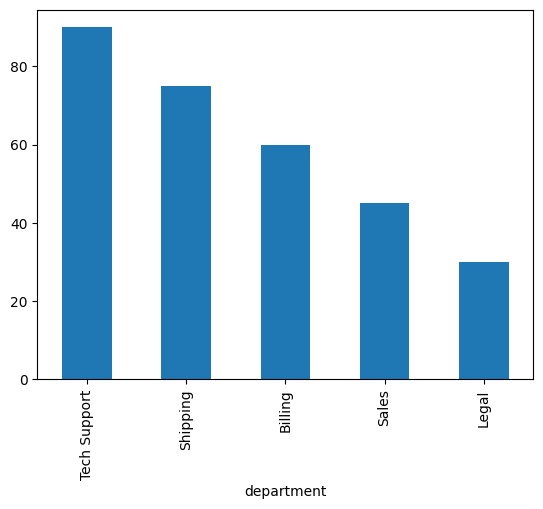

In [32]:
df["department"].value_counts().plot(kind="bar")

#### Basic analysis

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject     300 non-null    object
 1   body        300 non-null    object
 2   department  300 non-null    object
dtypes: object(3)
memory usage: 9.4+ KB


In [34]:
df.describe()

,subject,body,department
count,300,300,300
unique,287,300,5
top,WTF is this charge???,"Hey NextWav, big fan of your EchoWave One Plus...",Tech Support
freq,3,1,90


#### Missing values 

In [35]:
print("Missing values percentage:")
print(df.isna().sum() / len(df) * 100)

Missing values percentage:
subject       0.0
body          0.0
department    0.0
dtype: float64


In [36]:
print("length stats of subject:")

df["subject"].fillna("").apply(len).describe()

length stats of subject:


count    300.000000
mean      39.736667
std       15.044882
min        8.000000
25%       28.000000
50%       38.000000
75%       52.000000
max       77.000000
Name: subject, dtype: float64

#### Length stats

In [37]:
print("length stats of body:")

df["body"].fillna("").apply(len).describe()

length stats of body:


count    300.000000
mean     227.193333
std      147.664299
min       31.000000
25%      117.750000
50%      191.000000
75%      292.000000
max      751.000000
Name: body, dtype: float64

#### Sanity check

In [38]:
random_samples = df.sample(n=5, random_state=42)

for idx, row in random_samples.iterrows():
    print(f"\n{'=' * 80}")
    print(f"Sample {idx}:")
    print(f"Department: {row['department']}")
    print("\nSubject:")
    print(f"{row['subject']}")
    print("\nBody:")
    print(f"{row['body']}")
    print(f"{'=' * 80}")


Sample 203:
Department: Shipping

Subject:
Address issue with my order

Body:
Hello, I think I might have entered the wrong address for my AuraPods Gen 2 order. Can you help me with this? Also, how would I go about getting a refund if I return them?

Sample 266:
Department: Sales

Subject:
Shipping time for SoundBar Flex?

Body:
Need 100 units in 2 weeks. Can you make it happen or not?

Sample 152:
Department: Shipping

Subject:
WHERE IS MY ORDER???

Body:
EchoWave Mini not delivered. Order #67617. Need it NOW!

Sample 9:
Department: Tech Support

Subject:
StreamLink Hub not working???

Body:
Why isn't the touch panel working? I tried everything - update, reset, different phone... nothing helps. What's wrong with it?

Sample 233:
Department: Legal

Subject:
Privacy policy question

Body:
So I was just browsing your website and noticed some... interesting data collection practices. Care to explain?


#### Wordcloud

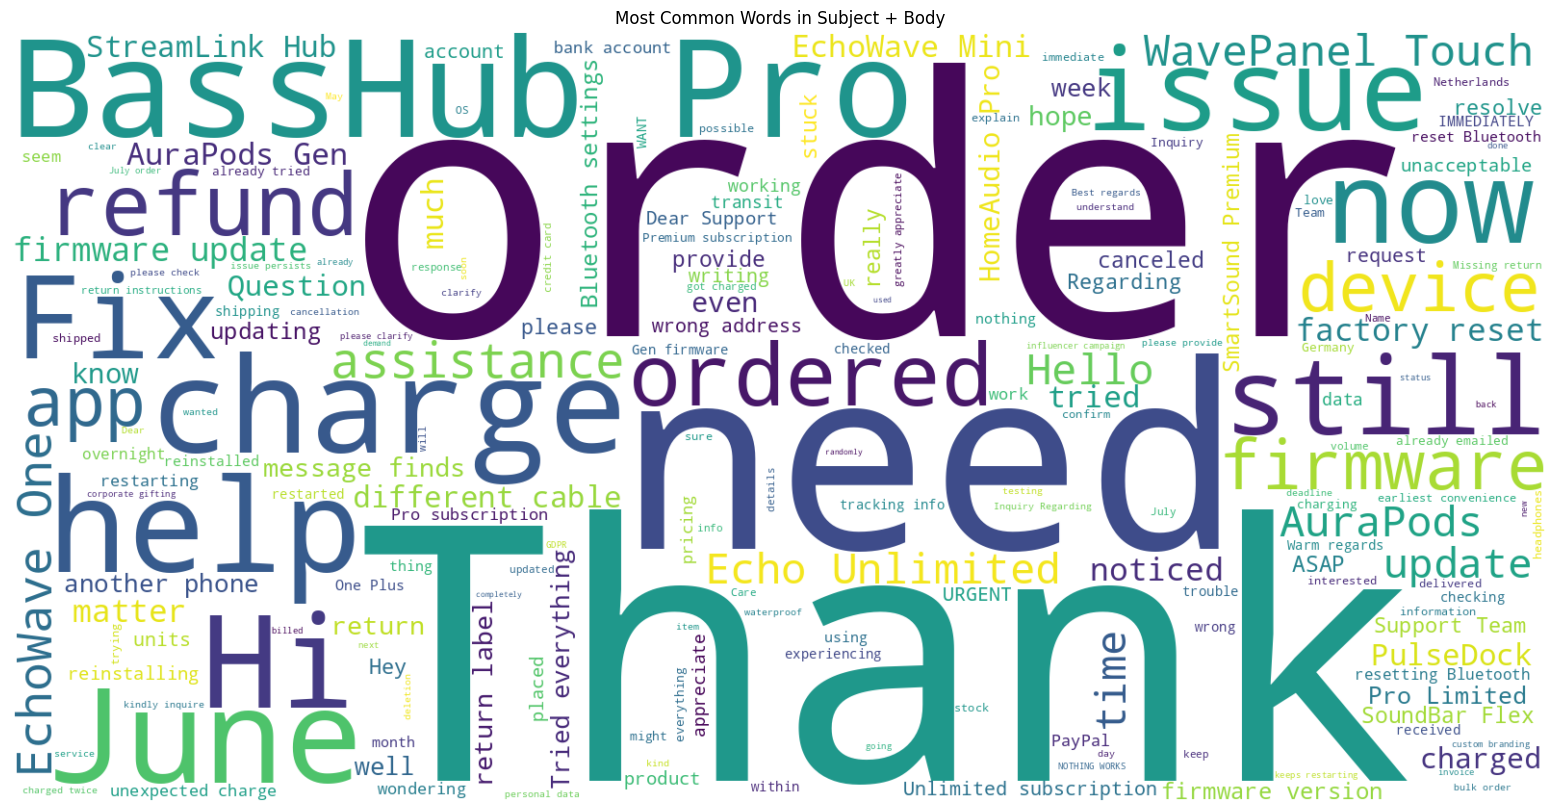

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

prompt = " ".join(df["subject"].fillna("") + " " + df["body"].fillna(""))

wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(prompt)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Subject + Body")
plt.show()
